8 - Selecione um dos modelos de classificação aprendidos até agora na disciplina (Naive Bayes ou Regressão Logística) e treine-o com df_no_salary. Seu objetivo é prever a recolocação (status = [Placed/Recolocado, Not Placed/Não Recolocado]) de cada indivíduo.(OK)

9 - Comente as avaliações (Recall, Precision, ROC e AUC) obtidas pelo modelo de classificação utilizado. Informe se os resultados são bons ou ruins de acordo com as métricas.(Falta Fazer)

10 - A partir de df_original, crie o Data Frame df_no_status agora removendo a coluna status,  aplicando o LabelEncoder, separe as amostras que não possuem o atributo salary (dados ausentes).(OK)

11 - Treine um modelo de regressão linear múltipla e preveja os salários (salary) das amostras que não possuem essa informação em df_no_status(OK)

12 - Para as amostras que não possuem o atributo salary preenchidos em df_no_status, inclua o valor previsto pelo modelo de regressão linear múltipla(OK)

13 - Agora que você preencheu os dados ausentes do atributo salary de df_no_status, copie o atributos salary de df_no_status para df_original(OK)

14 - Treine o modelo de classificação selecionado em 8 agora com df_original, com o mesmo objetivo de prever a recolocação

15 - Compare e comente os resultados obtidos em 9 com os resultados obtidos em 14

In [213]:
PSDS_PATH <- 'C://Users//ADM//OneDrive//FAESA - Sistemas de Informação//5ª Período//Análise de Dados Aplicada a Computação//Avaliação C2'
DataSet <- read.csv(file.path(PSDS_PATH, 'Placement_Data_Full_Class.csv'), header=TRUE, sep=",")

In [214]:
df_original <- data.frame(DataSet)

In [215]:
head(df_original)

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NA
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed,NA


In [216]:
df_no_salary <- data.frame(df_original)

In [217]:
df_no_salary$salary <- NULL
head(df_no_salary)

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.0,Mkt&Fin,51.58,Not Placed


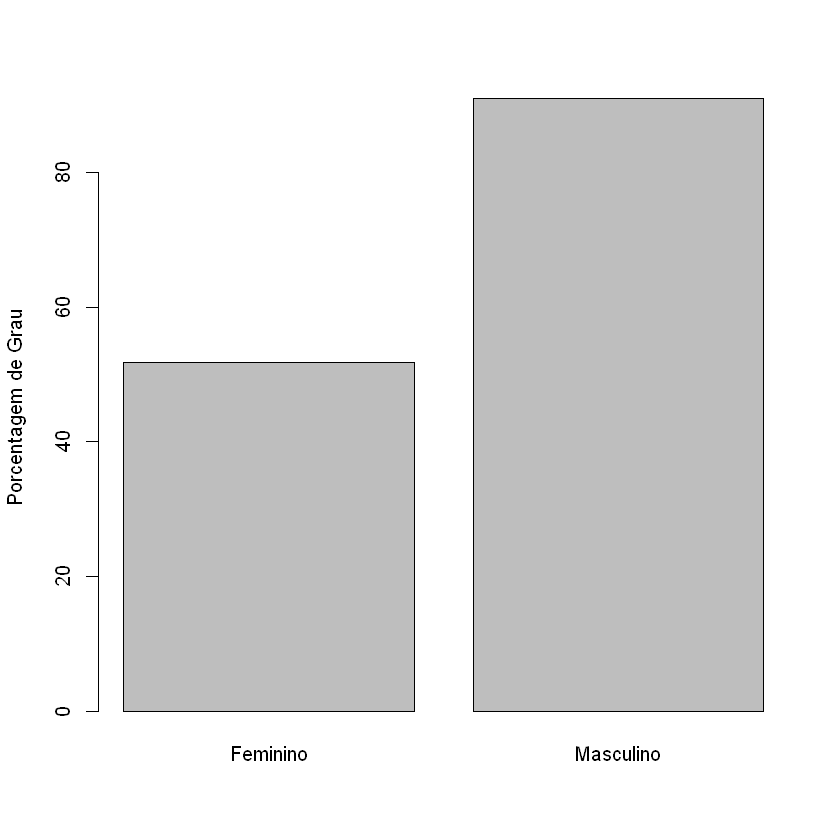

In [218]:
barplot(height=c(sum(df_original[df_original$gender == 'F', ]$degree_p), 
                 sum(df_original[df_original$gender == 'M', ]$degree_p))/100,
        ylab = "Porcentagem de Grau",
        names=c('Feminino', 'Masculino'))

Através deste gráfico podemos ver que o gênero feminino possui uma porcentagem de grau(degree_p), de mais ou menos, 45% menor que o gênero masculino.


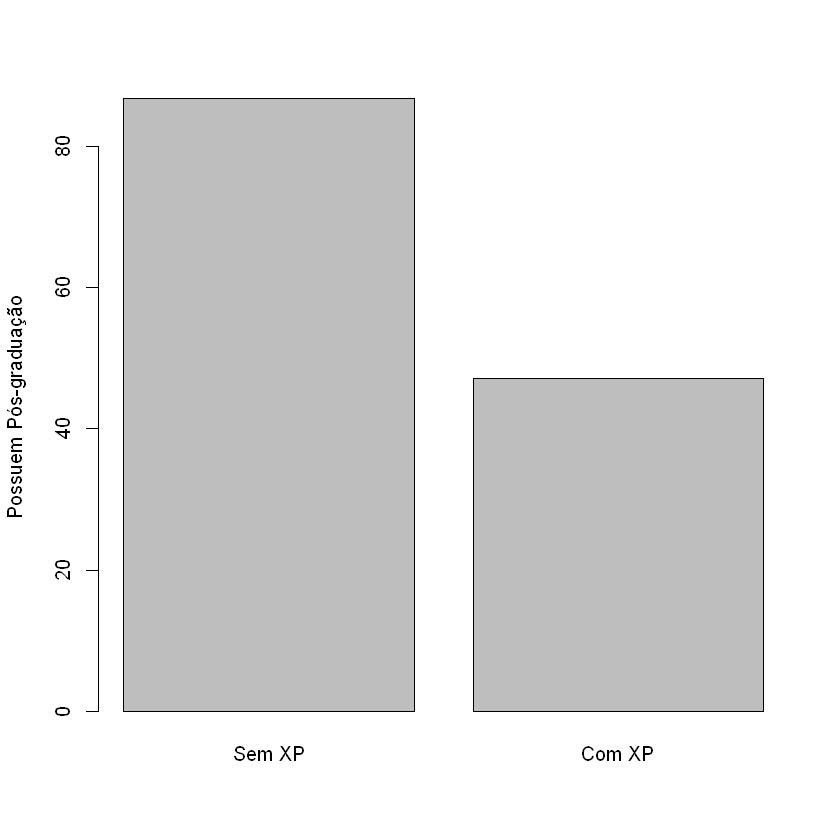

In [219]:
barplot(height=c(sum(df_original[df_original$workex == 'No', ]$mba_p), 
                 sum(df_original[df_original$workex == 'Yes', ]$mba_p))/100,
        ylab = "Possuem Pós-graduação",
        names=c('Sem XP', 'Com XP'))

Analisando esse gráfico identificamos que a maioria das pessoas que possuem a pós-graduação(mba_p) não possuem experiência de trabalho. 

[1] "Mkt&HR"


5%   25%   50%   75% 
 17.8  53.5 112.0 168.0

[1] "Mkt&Fin"


5%    25%    50%    75% 
  8.95  57.75  99.50 155.75

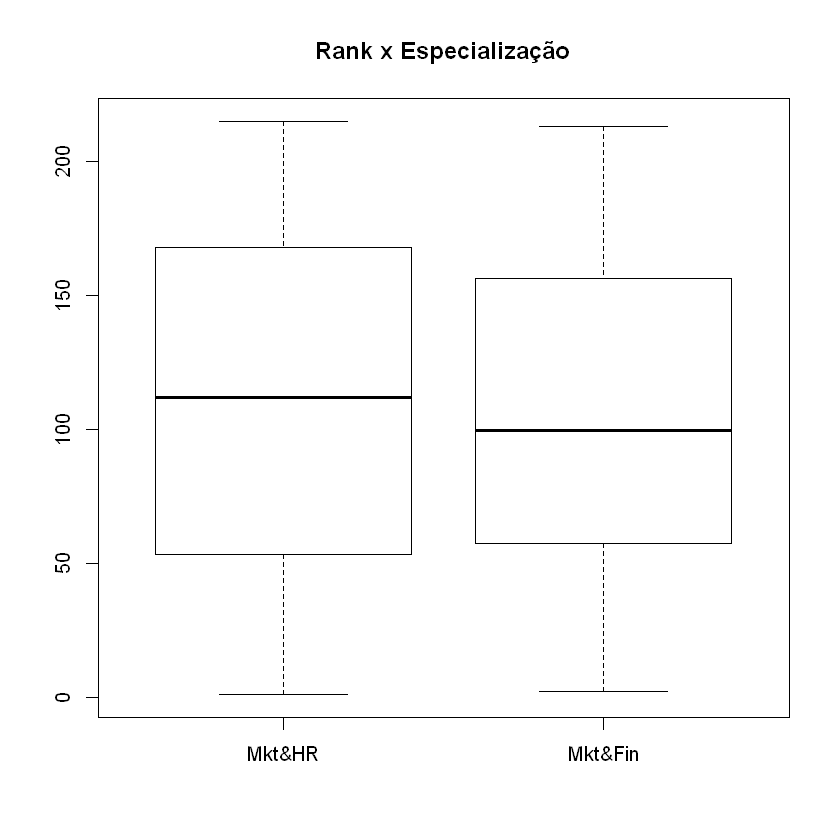

In [220]:
boxplot(df_original[df_original$specialisation == "Mkt&HR",]$sl_no, 
        df_original[df_original$specialisation == "Mkt&Fin",]$sl_no,
        main = "Rank x Especialização",
        names = c("Mkt&HR", "Mkt&Fin")
       )
print("Mkt&HR")
quantile(df_original[df_original$specialisation == "Mkt&HR",]$sl_no, p=c(0.05,0.25,0.5,0.75))
print("Mkt&Fin")
quantile(df_original[df_original$specialisation == "Mkt&Fin",]$sl_no, p=c(0.05,0.25,0.5,0.75))

In [221]:
gender <- c(df_no_salary$gender)
factores_gender <- factor(gender)
df_no_salary$gender <- factores_gender

ssc_b <- c(df_no_salary$ssc_b)
factores_ssc_b <- factor(ssc_b)
df_no_salary$ssc_b <- factores_ssc_b

hsc_b <- c(df_no_salary$hsc_b)
factores_hsc_b <- factor(hsc_b)
df_no_salary$hsc_b <- factores_hsc_b

hsc_s <- c(df_no_salary$hsc_s)
factores_hsc_s <- factor(hsc_s)
df_no_salary$hsc_s <- factores_hsc_s

degree_t <- c(df_no_salary$degree_t)
factores_degree_t <- factor(degree_t)
df_no_salary$degree_t <- factores_degree_t

workex <- c(df_no_salary$workex)
factores_workex <- factor(workex)
df_no_salary$workex <- factores_workex

specialisation <- c(df_no_salary$specialisation)
factores_specialisation <- factor(specialisation)
df_no_salary$specialisation <- factores_specialisation

status <- c(df_no_salary$status)
factores_status <- factor(status)
df_no_salary$status <- factores_status

links das referências:

#https://stackoverflow.com/questions/38620424/label-encoder-functionality-in-r

#https://youtu.be/ViIBKzekdz0

#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [222]:
#Passo 8: Biblioteca de onde o naiveBayes é chamada
library(klaR)

In [223]:
#Passo 8: Treinando o modelo
naive_model <- NaiveBayes(status ~ ., data = na.omit(df_no_salary))
naive_model$table

$sl_no
      [,1]     [,2]
1 110.4776 65.85967
2 106.8784 60.68250

$gender
        var
grouping         1         2
       1 0.4179104 0.5820896
       2 0.3243243 0.6756757

$ssc_p
      [,1]     [,2]
1 57.54403 8.394246
2 71.72149 8.715445

$ssc_b
        var
grouping         1         2
       1 0.5671642 0.4328358
       2 0.5270270 0.4729730

$hsc_p
      [,1]     [,2]
1 58.39552 9.914090
2 69.92655 9.329268

$hsc_b
        var
grouping         1         2
       1 0.4029851 0.5970149
       2 0.3851351 0.6148649

$hsc_s
        var
grouping          1          2          3
       1 0.07462687 0.50746269 0.41791045
       2 0.04054054 0.53378378 0.42567568

$degree_p
      [,1]     [,2]
1 61.13418 6.365825
2 68.74054 6.518087

$degree_t
        var
grouping          1          2          3
       1 0.64179104 0.08955224 0.26865672
       2 0.68918919 0.03378378 0.27702703

$workex
        var
grouping         1         2
       1 0.8507463 0.1492537
       2 0.5675676 0.4324324



In [224]:
#Passo 8: selecionando o atributo a ser realocado
new_loan <- df_no_salary[4, c('sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p')]
row.names(new_loan) <- NULL
new_loan

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
4,2,56,1,52,1,3,52,3,1,66,2,59.43


In [225]:
#Passo 8: Previsão de realocação do indivíduo
predict(naive_model, new_loan)

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 1"

1,2
0.9975107,0.002489263


In [226]:
#Passo 9: Previsão para a confusion matrix
pred <- predict(naive_model, newdata=df_no_salary)

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 1"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 2"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 3"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 4"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 5"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 6"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 7"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 8"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 9"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 10"Warning message in FUN(X[[i]]

"Numerical 0 probability for all classes with observation 84"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 85"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 86"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 87"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 88"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 89"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 90"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 91"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 92"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 93"Warning message in FUN(X[[i]], ...):
"Numerical 0 probabi

"Numerical 0 probability for all classes with observation 167"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 168"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 169"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 170"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 171"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 172"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 173"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 174"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 175"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 176"Warning message in FUN(X[[i]], ...):
"Numerical

In [275]:
#Passo 9: Avaliação do modelo

# Confusion matrix
pred_y <- as.numeric(unlist(pred) > 1)
true_y <- as.numeric(df_no_salary$status==1)
true_pos <- (true_y==1) & (pred_y==1)
true_neg <- (true_y==0) & (pred_y==0)
false_pos <- (true_y==0) & (pred_y==1)
false_neg <- (true_y==1) & (pred_y==0)
conf_mat <- matrix(c(sum(true_pos), sum(false_pos),
sum(false_neg), sum(true_neg)), 2, 2)
colnames(conf_mat) <- c('Yhat = 1', 'Yhat = 0')
rownames(conf_mat) <- c('Y = 1', 'Y = 0')
conf_mat

,Yhat = 1,Yhat = 0
Y = 1,16,185
Y = 0,132,312


In [276]:
print(paste("Precision: ", (conf_mat[1, 1] / sum(conf_mat[,1]))))
print(paste("Recall: ", (conf_mat[1, 1] / sum(conf_mat[1,]))))
print(paste("Specificity: ", (conf_mat[2, 2] / sum(conf_mat[2,]))))

[1] "Precision:  0.108108108108108"
[1] "Recall:  0.0796019900497512"
[1] "Specificity:  0.702702702702703"


Precisão: Indica que a cada cem realocações é esperado que dez delas esteja correta.

Recall: Indica que a cada cem realocações, sete delas estarão realmente corretas.

In [229]:
library('ggplot2')

Warning message:
"Removed 430 rows containing missing values (geom_path)."

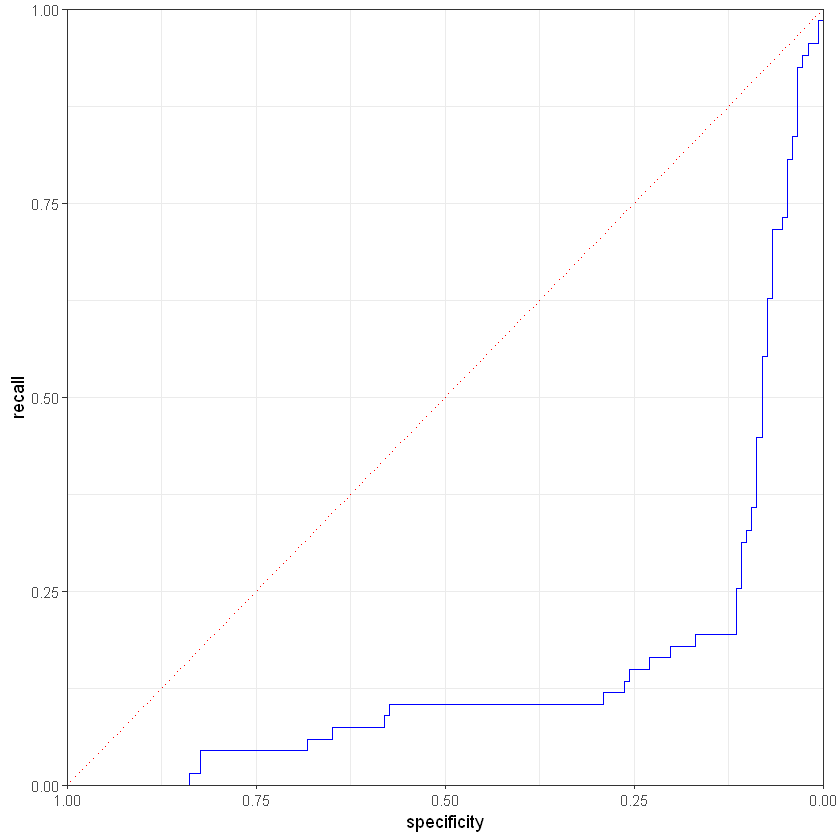

In [266]:
#Passo 9: Gráfico ROC

pred <- as.numeric(unlist(pred))
idx <- order(-predd)
recall <- cumsum(true_y[idx] == 1) / sum(true_y == 1)
specificity <- (sum(true_y == 0) - cumsum(true_y[idx] == 0)) / sum(true_y == 0)
roc_df <- data.frame(recall = recall, specificity = specificity)
graph <- ggplot(roc_df, aes(x=specificity, y=recall)) +
 geom_line(color='blue') + 
 scale_x_reverse(expand=c(0, 0)) +
 scale_y_continuous(expand=c(0, 0)) + 
 geom_line(data=data.frame(x=(0:100) / 100), aes(x=x, y=1-x),
 linetype='dotted', color='red') +
 theme_bw() + theme(plot.margin=unit(c(5.5, 10, 5.5, 5.5), "points"))
graph

De acordo com esse gráfico ROC que é uma forma de avaliar a qualidade do modelo. Vejo que meu modelo de previsão, baseada na realocação "Placed", não possui uma qualidade boa, pois, sua curva está mais próxima do canto inferior direito, ou seja, do zero. 

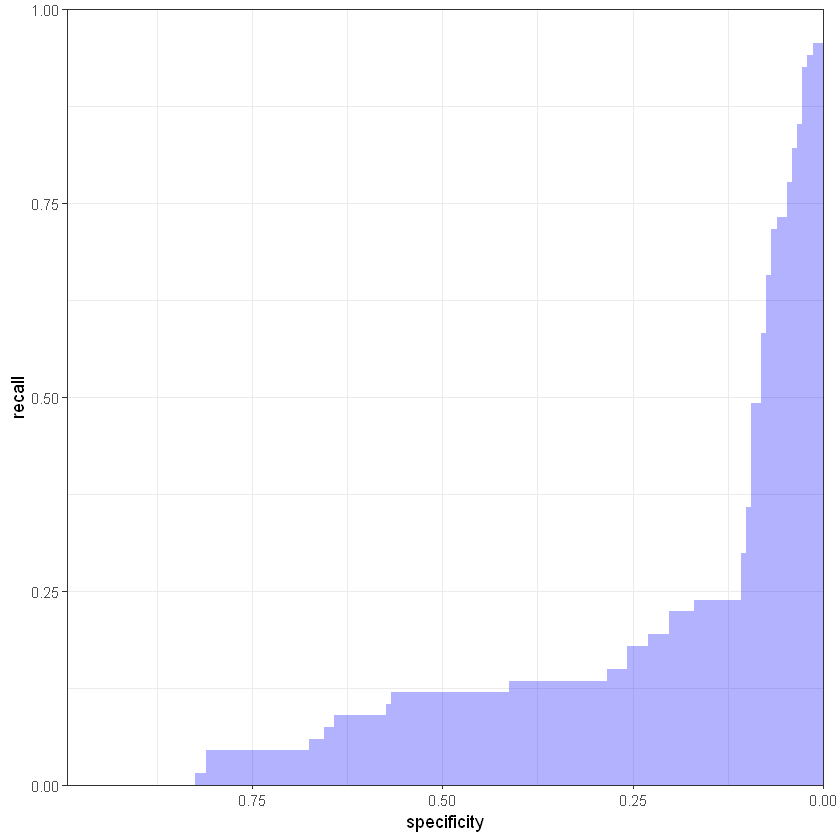

In [231]:
#Passo 9: Gráfico AUC

graph <- ggplot(roc_df, aes(specificity)) +
 geom_ribbon(aes(ymin=0, ymax=recall), fill='blue', alpha=.3) +
 scale_x_reverse(expand=c(0, 0)) +
 scale_y_continuous(expand=c(0, 0)) +
 labs(y='recall') +
 theme_bw() + theme(plot.margin=unit(c(5.5, 10, 5.5, 5.5), "points"))
graph

In [232]:
#Passo 10: Criando a cópia do Original
df_no_status <- data.frame(df_original)
df_no_status$status <- NULL

In [233]:
#Passo 10: Aplicando o labelEnconder em df_no_status
gender <- c(df_no_status$gender)
factores_gender <- factor(gender)
df_no_status$gender <- factores_gender

ssc_b <- c(df_no_status$ssc_b)
factores_ssc_b <- factor(ssc_b)
df_no_status$ssc_b <- factores_ssc_b

hsc_b <- c(df_no_status$hsc_b)
factores_hsc_b <- factor(hsc_b)
df_no_status$hsc_b <- factores_hsc_b

hsc_s <- c(df_no_status$hsc_s)
factores_hsc_s <- factor(hsc_s)
df_no_status$hsc_s <- factores_hsc_s

degree_t <- c(df_no_status$degree_t)
factores_degree_t <- factor(degree_t)
df_no_status$degree_t <- factores_degree_t

workex <- c(df_no_status$workex)
factores_workex <- factor(workex)
df_no_status$workex <- factores_workex

specialisation <- c(df_no_status$specialisation)
factores_specialisation <- factor(specialisation)
df_no_status$specialisation <- factores_specialisation
#Fim  do labelEncoder

In [234]:
#Passo 10: Separando os dois dataframes
df_NAs <- data.frame(df_no_status[is.na(df_no_status$salary),])
df_no_status_2 <- data.frame(df_no_status[!is.na(df_no_status$salary),])

In [252]:
#Passo 11: Treinando o modelo 
modelo <- lm(salary ~ ., data=df_no_status_2)
summary(modelo)


Call:
lm(formula = salary ~ ., data = df_no_status_2)

Residuals:
    Min      1Q  Median      3Q     Max 
-121407  -44989  -17254   23270  601001 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)  
(Intercept)      99506.85  116545.04   0.854   0.3948  
sl_no               58.33     133.34   0.437   0.6625  
gender2          24923.17   18026.47   1.383   0.1691  
ssc_p             -908.95    1106.38  -0.822   0.4128  
ssc_b2            2861.57   21706.05   0.132   0.8953  
hsc_p              226.56    1042.75   0.217   0.8283  
hsc_b2           -8943.23   21331.64  -0.419   0.6757  
hsc_s2           63847.15   44149.42   1.446   0.1505  
hsc_s3           50646.61   47209.10   1.073   0.2853  
degree_p         -1852.85    1425.23  -1.300   0.1959  
degree_t2        28726.49   49367.99   0.582   0.5616  
degree_t3        40198.77   25478.06   1.578   0.1170  
workex2           9060.50   16568.12   0.547   0.5854  
etest_p            611.90     646.74   0.946   0.345

In [236]:
#Passo 11: Prevendo os resultados
df_result <- data.frame(salary=predict(modelo, df_NAs)) 

In [237]:
#Passo 12: Substituindo os valores previstos em df_NAs
df_NAs$salary <- df_result$salary 

In [238]:
#Passo 12: Concatenação dos dois dataframes
novo <- data.frame(rbind(df_NAs, df_no_status_2))

In [239]:
#Passo 12: Ordenação do dataframe depois de ter concatenado anteriormente
df_no_status <- novo[order(novo$sl_no),]

In [251]:
#Passo 13: Copiando para df_original
df_original$salary <- df_no_status$salary

In [250]:
#Aplicando o Label Encoder em df_original

gender <- c(df_original$gender)
factores_gender <- factor(gender)
df_original$gender <- factores_gender

ssc_b <- c(df_original$ssc_b)
factores_ssc_b <- factor(ssc_b)
df_original$ssc_b <- factores_ssc_b

hsc_b <- c(df_original$hsc_b)
factores_hsc_b <- factor(hsc_b)
df_original$hsc_b <- factores_hsc_b

hsc_s <- c(df_original$hsc_s)
factores_hsc_s <- factor(hsc_s)
df_original$hsc_s <- factores_hsc_s

degree_t <- c(df_original$degree_t)
factores_degree_t <- factor(degree_t)
df_original$degree_t <- factores_degree_t

workex <- c(df_original$workex)
factores_workex <- factor(workex)
df_original$workex <- factores_workex

specialisation <- c(df_original$specialisation)
factores_specialisation <- factor(specialisation)
df_original$specialisation <- factores_specialisation

status <- c(df_original$status)
factores_status <- factor(status)
df_original$status <- factores_status

In [242]:
#Passo 14: Treiando o modelo com o df_original atualizado
library(klaR)
naive_model_atual <- NaiveBayes(status ~ ., data = na.omit(df_original))

In [243]:
#Passo 14: selecionando o atributo a ser realocado
new_loan_atual <- df_original[4, c('sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'salary')]
row.names(new_loan_atual) <- NULL
new_loan_atual

sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
4,2,56,1,52,1,3,52,3,1,66,2,59.43,327446.2


In [244]:
#Passo 14: Previsão de realocação do indivíduo
predict(naive_model_atual, new_loan_atual)

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 1"

1,2
0.9987654,0.001234566


In [245]:
#Passo 14: Previsão para a matriz de confusão
pred_atual <- predict(naive_model_atual, newdata=df_original)

Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 1"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 2"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 3"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 4"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 5"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 6"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 7"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 8"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 9"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 10"Warning message in FUN(X[[i]]

"Numerical 0 probability for all classes with observation 84"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 85"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 86"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 87"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 88"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 89"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 90"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 91"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 92"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 93"Warning message in FUN(X[[i]], ...):
"Numerical 0 probabi

"Numerical 0 probability for all classes with observation 167"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 168"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 169"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 170"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 171"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 172"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 173"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 174"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 175"Warning message in FUN(X[[i]], ...):
"Numerical 0 probability for all classes with observation 176"Warning message in FUN(X[[i]], ...):
"Numerical

In [263]:
#Passo 14

# Confusion matrix
pred_y <- as.numeric(unlist(pred_atual) > 1)
true_y <- as.numeric(df_original$status==1)
true_pos <- (true_y==1) & (pred_y==1)
true_neg <- (true_y==0) & (pred_y==0)
false_pos <- (true_y==0) & (pred_y==1)
false_neg <- (true_y==1) & (pred_y==0)
conf_mat <- matrix(c(sum(true_pos), sum(false_pos),
sum(false_neg), sum(true_neg)), 2, 2)
colnames(conf_mat) <- c('Yhat = 1', 'Yhat = 0')
rownames(conf_mat) <- c('Y = 1', 'Y = 0')
conf_mat

print(paste("Precision: ", (conf_mat[1, 1] / sum(conf_mat[,1]))))
print(paste("Recall: ", (conf_mat[1, 1] / sum(conf_mat[1,]))))
print(paste("Specificity: ", (conf_mat[2, 2] / sum(conf_mat[2,]))))

,Yhat = 1,Yhat = 0
Y = 1,13,188
Y = 0,131,313


[1] "Precision:  0.0902777777777778"
[1] "Recall:  0.0646766169154229"
[1] "Specificity:  0.704954954954955"


Precisão: Indica que a cada cem realocações é esperado que nove delas esteja correta.

Recall: Indica que a cada cem realocações, seis delas estarão realmente corretas.

Warning message:
"Removed 430 rows containing missing values (geom_path)."

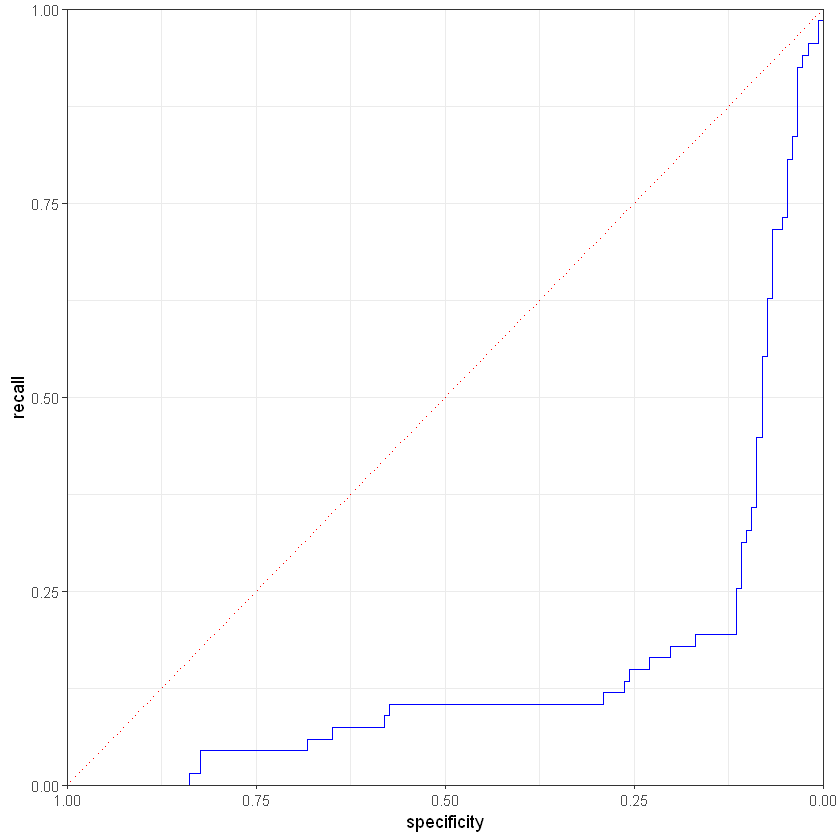

In [264]:
#Passo 14: Gráfico ROC

library('ggplot2')

predd <- as.numeric(unlist(pred_atual))
idx <- order(-predd)
recall <- cumsum(true_y[idx] == 1) / sum(true_y == 1)
specificity <- (sum(true_y == 0) - cumsum(true_y[idx] == 0)) / sum(true_y == 0)
roc_df <- data.frame(recall = recall, specificity = specificity)
graph <- ggplot(roc_df, aes(x=specificity, y=recall)) +
 geom_line(color='blue') + 
 scale_x_reverse(expand=c(0, 0)) +
 scale_y_continuous(expand=c(0, 0)) + 
 geom_line(data=data.frame(x=(0:100) / 100), aes(x=x, y=1-x),
 linetype='dotted', color='red') +
 theme_bw() + theme(plot.margin=unit(c(5.5, 10, 5.5, 5.5), "points"))
graph

De acordo com esse gráfico ROC que é uma forma de avaliar a qualidade do modelo. Vejo que meu modelo de previsão, baseada na realocação "Placed", não possui uma qualidade boa, pois, sua curva está mais próxima do canto inferior direito, ou seja, do zero. 

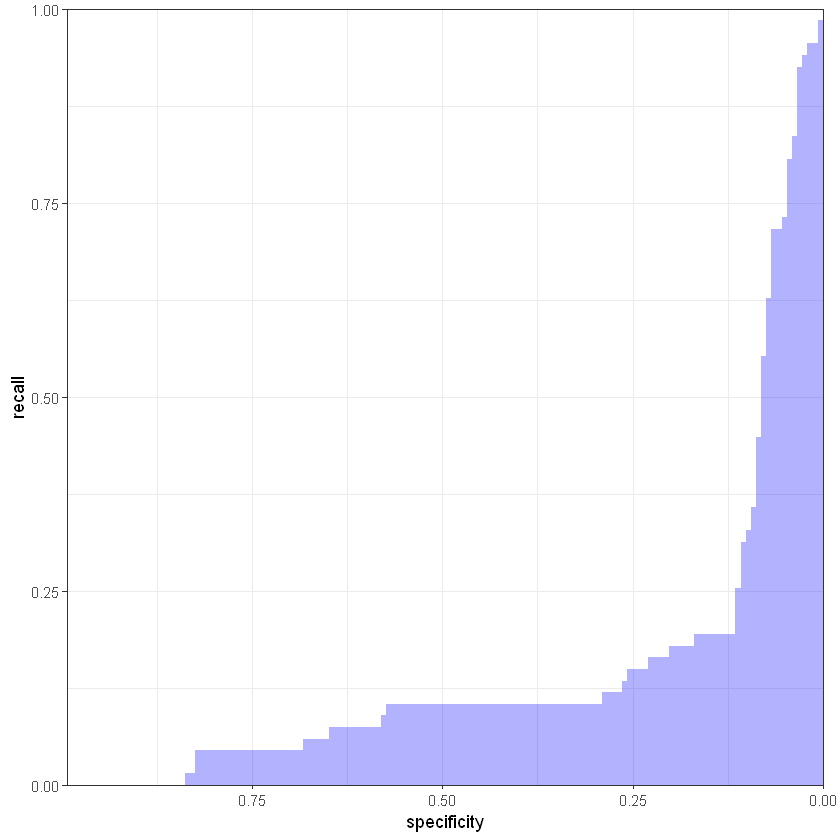

In [265]:
#Passo 14: Gráfico AUC

graph <- ggplot(roc_df, aes(specificity)) +
 geom_ribbon(aes(ymin=0, ymax=recall), fill='blue', alpha=.3) +
 scale_x_reverse(expand=c(0, 0)) +
 scale_y_continuous(expand=c(0, 0)) +
 labs(y='recall') +
 theme_bw() + theme(plot.margin=unit(c(5.5, 10, 5.5, 5.5), "points"))
graph